In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas_profiling
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
import scipy
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor

# Feature Engineering and Exploratory data analysis

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.shape

(17379, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Missing Value Analysis

In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.weekday.value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

In [9]:
df.workingday.value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

In [10]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

# We will use pandas_profiling library to understand the data. It is a nice alternative to using .info and .describe methods. Infact, it gives much more useful informations like % of mising values, mean, maximum, minimum, heatmap depicting correlation, etc.

In [11]:
df.profile_report()

# The collinearity between temperature ‘temp’ and the feeling-like temperature ‘atemp’ is evident. As a result, the feel-like temperature, which is derived from ‘temp’, will be excluded during the modeling process. In general, the bicycle counts show a positive correlation with temperature and a negative correlation with humidity. The bottom row of the scatter plot matrix shows these tendencies. Also, notice that some of the time variables have a high correlation with the bicycle counts; this is especially true for hours. The next sections will explore, graphically, the relationship of bicycle counts with time variables.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Distribution of boolean variables
# “1” means “Yes”, “0” means “No”'

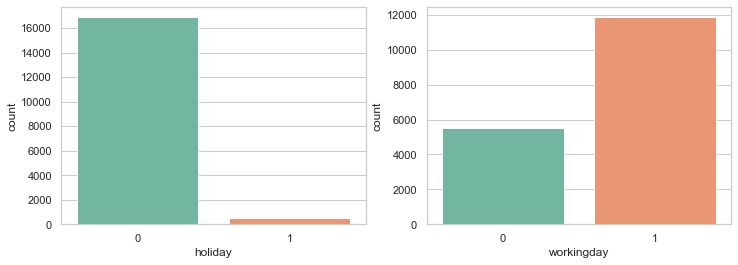

In [14]:
sns.set(style="whitegrid",palette='Set2')
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.countplot(x=df.holiday,ax=axes[0])
sns.countplot(x=df.workingday,ax=axes[1])
plt.show()

# "Distribution of continuous variables"

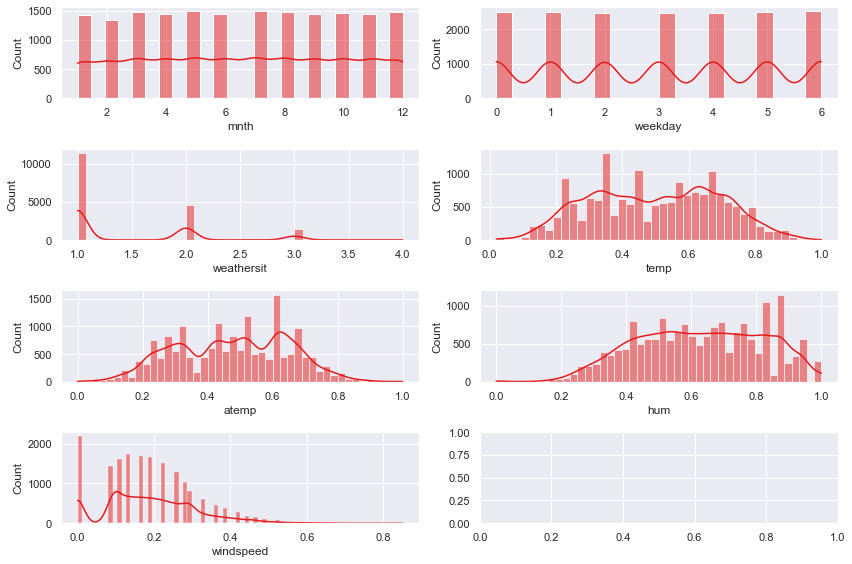

In [15]:
sns.set(style="darkgrid",palette='Set1')

fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(12,8))
sns.histplot(df.mnth,ax=axes[0,0], kde=True)
sns.histplot(df.weekday,ax=axes[0,1], kde=True)
sns.histplot(df.weathersit,ax=axes[1,0], kde=True)
sns.histplot(df.temp,ax=axes[1,1], kde=True)
sns.histplot(df.atemp,ax=axes[2,0], kde=True)
sns.histplot(df.hum,ax=axes[2,1], kde=True)
sns.histplot(df.windspeed,ax=axes[3,0], kde=True)
plt.tight_layout()

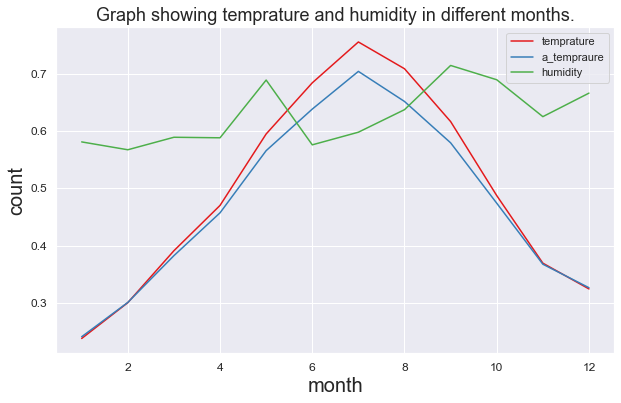

In [16]:
graph_3 = df.groupby("mnth").temp.mean()
graph_4 = df.groupby("mnth").atemp.mean()
graph_5 = df.groupby("mnth").hum.mean()

plt.figure(figsize=(10,6))
sns.lineplot(data=graph_3, label="temprature")
sns.lineplot(data=graph_4, label="a_tempraure")
sns.lineplot(data=graph_5, label="humidity")
plt.title("Graph showing temprature and humidity in different months.",{'fontsize':18})
plt.xlabel("month", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

# The plot shows the relationship between cnt variable and temperature. There seems to be a linear relationship between them, which means more people will rent bikes when it gets warmer.

In [17]:
# Graph showing months with count of bikes rented 

Text(0, 0.5, 'count')

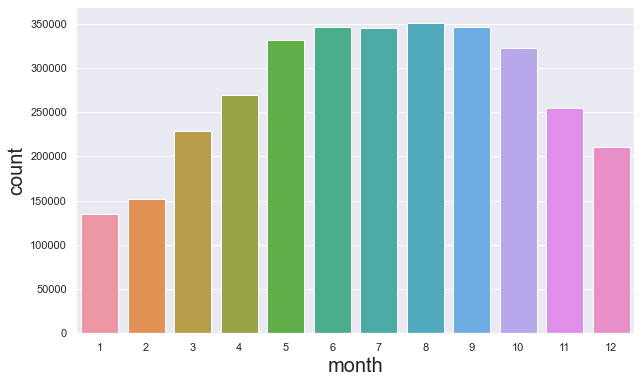

In [18]:
graph = df.groupby("mnth",as_index=False).cnt.sum()
plt.figure(figsize=(10,6))
sns.barplot(x=graph["mnth"], y=graph["cnt"])
plt.xlabel("month", size=20)
plt.ylabel("count", size=20)

Text(0, 0.5, 'count')

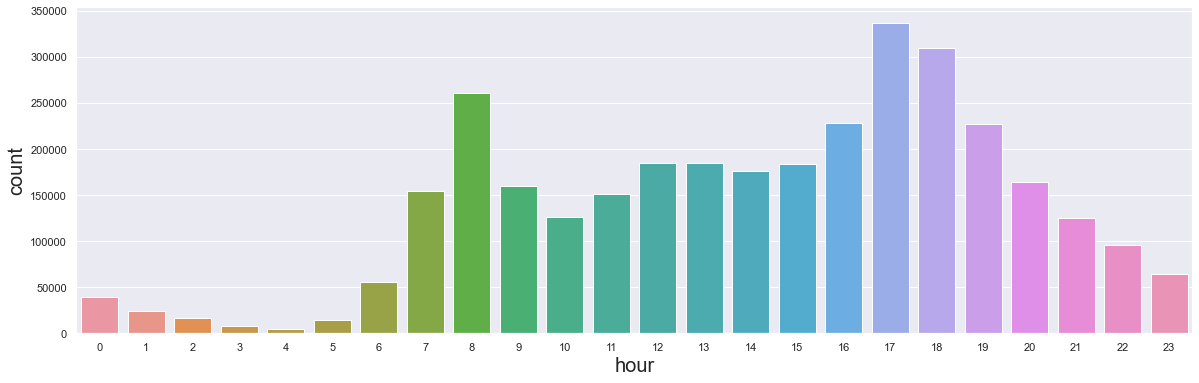

In [19]:
graph = df.groupby("hr",as_index=False).cnt.sum()
plt.figure(figsize=(20,6))
sns.barplot(x=graph["hr"], y=graph["cnt"])
plt.xlabel("hour", size=20)
plt.ylabel("count", size=20)

In [20]:
fig=plt.figure(figsize=(40,40))
    sns.pairplot(df[['season','holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']])
plt.show()

IndentationError: unexpected indent (<ipython-input-20-202b734e08c5>, line 2)

In [22]:
import datetime

In [23]:
df['hr'] = pd.to_timedelta(df['hr'], unit='h')

In [24]:
df.dtypes

instant                 int64
dteday                 object
season                  int64
yr                      int64
mnth                    int64
hr            timedelta64[ns]
holiday                 int64
weekday                 int64
workingday              int64
weathersit              int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual                  int64
registered              int64
cnt                     int64
dtype: object

In [25]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [26]:
df.dtypes

instant                 int64
dteday         datetime64[ns]
season                  int64
yr                      int64
mnth                    int64
hr            timedelta64[ns]
holiday                 int64
weekday                 int64
workingday              int64
weathersit              int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual                  int64
registered              int64
cnt                     int64
dtype: object

In [27]:
df['dteday'] = df['dteday'] + df['hr']

In [28]:
df.dtypes

instant                 int64
dteday         datetime64[ns]
season                  int64
yr                      int64
mnth                    int64
hr            timedelta64[ns]
holiday                 int64
weekday                 int64
workingday              int64
weathersit              int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual                  int64
registered              int64
cnt                     int64
dtype: object

In [29]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,1,00:00:00,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01 01:00:00,1,0,1,01:00:00,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01 02:00:00,1,0,1,02:00:00,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01 03:00:00,1,0,1,03:00:00,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01 04:00:00,1,0,1,04:00:00,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


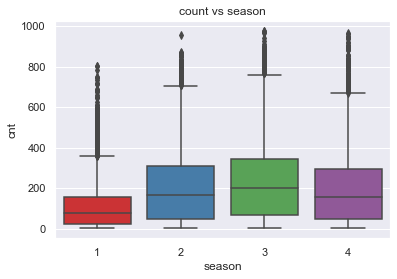

In [30]:
ax = sns.boxplot(x='season', y='cnt', data=df)
ax.set_title('count vs season')
plt.show()

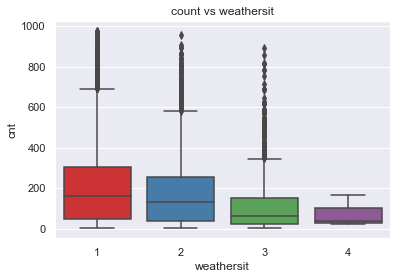

In [31]:
ax = sns.boxplot(x='weathersit', y='cnt', data=df)
ax.set_title('count vs weathersit')
plt.show()

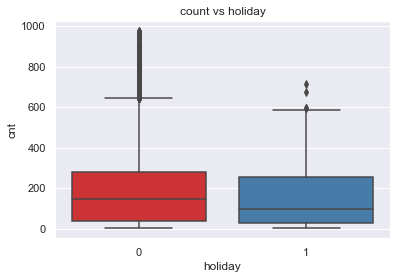

In [32]:
ax = sns.boxplot(x='holiday', y='cnt', data=df)
ax.set_title('count vs holiday')
plt.show()

In [33]:
df.drop(['yr', 'mnth', 'hr', 'atemp'],axis=1,inplace=True)
df.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,6,0,1,0.24,0.81,0.0,3,13,16
1,2,2011-01-01 01:00:00,1,0,6,0,1,0.22,0.80,0.0,8,32,40
2,3,2011-01-01 02:00:00,1,0,6,0,1,0.22,0.80,0.0,5,27,32
3,4,2011-01-01 03:00:00,1,0,6,0,1,0.24,0.75,0.0,3,10,13
4,5,2011-01-01 04:00:00,1,0,6,0,1,0.24,0.75,0.0,0,1,1


In [34]:
df.columns

Index(['instant', 'dteday', 'season', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

# Type casting the datetime and categorical attributes

In [35]:
df['dteday']=pd.to_datetime(df.dteday)

df['season']=df.season.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weathersit']=df.weathersit.astype('category')

In [36]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season              category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

# Final model for predicting the bike rental count on daily basis

In [37]:
X = df[['season', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed']].values

In [38]:
y = df['cnt'].values

In [48]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.3,random_state=42)
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)
r2_scores = cross_val_score(lr, X_train, y_train, cv=3)
mse_scores = cross_val_score(lr, X_train, y_train, cv=3,scoring='neg_mean_squared_error')
print(r2_scores)
print(mse_scores)
lr.score(X_train,y_train)

[0.24045819 0.2758361  0.27611882]
[-24946.79269754 -24146.65688886 -24720.90819209]


0.265821514364353

In [49]:
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=40)
dtr.fit(X_train,y_train)
dtr.score(X_train,y_train)

0.33001135561291417

In [50]:
param_random = {"criterion": ["mse", "mae"],
              "min_samples_split": sp_randint(1, 5, 10),
              "max_depth": [2, 6, 8],
              "min_samples_leaf": sp_randint(5, 10,20),
              "max_leaf_nodes": sp_randint( 10, 20, 40),
              }
randomized_cv_dtr = RandomizedSearchCV(dtr, param_random, cv=3,random_state=32)
randomized_cv_dtr.fit(X_train,y_train)
print(randomized_cv_dtr.best_score_)
print(randomized_cv_dtr.best_params_)

0.2996768377121553
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 50, 'min_samples_leaf': 28, 'min_samples_split': 13}


In [51]:
rf=RandomForestRegressor(n_estimators=200)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.879917379479094

In [46]:
r2_scores_ = cross_val_score(rf, X_train, y_train, cv=3)
mse_scores_ = cross_val_score(rf, X_train, y_train, cv=3,scoring='neg_mean_squared_error')
print(r2_scores_)
print(mse_scores_)

[0.31446191 0.31239651 0.32442147]
[-22411.2498909  -22962.88352387 -23008.63164538]


# When we compare the root mean squared error and mean absolute error of all 3 models, the random forest model has less root mean squared error and mean absolute error. So, finally random forest model is best for predicting the bike rental count on daily basis.